Laser cutting analysis 

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
from glob import glob
import pandas as pd
from re import findall as find
import pandas as pd
#import seaborn as sns

<Axes: xlabel='x [px]'>

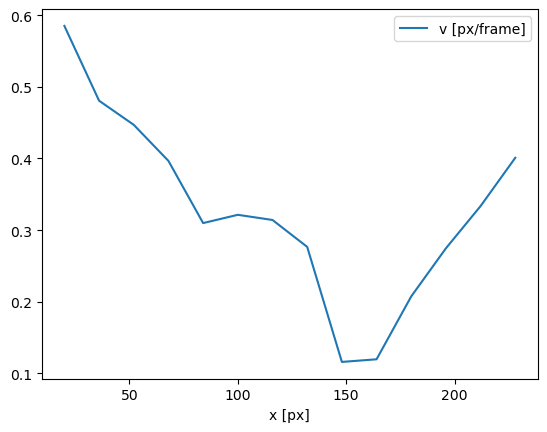

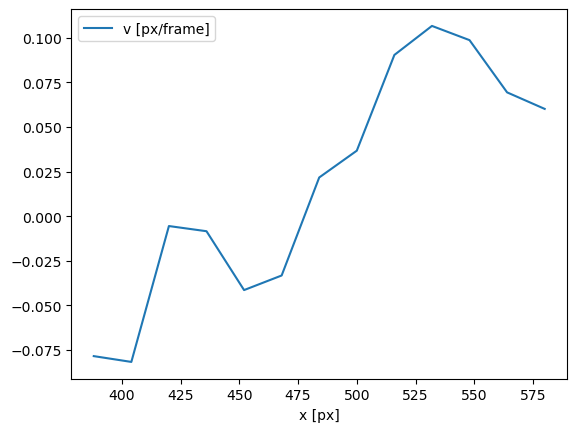

In [12]:
laserfolder="H:\\PHD_data\\Imaging_et_analysis\\SDlaserCuter\\2023\\06_Jun\\30062023_krt18Utr_7hpfcuts\\"
#iterate over the folders in the laser folder
folders = [f for f in glob(laserfolder + "**/**/", recursive=False)]
laserfolder0=folders[0]
laserfiles=glob(laserfolder0+"*.txt")  
#read the file in laserfiles[0] and make a numpy matrix from the values in it
laserdata=pd.read_csv(laserfiles[0],skiprows=2)
# Filter the DataFrame based on the conditions
filtered_data = laserdata[(laserdata['x [px]'] >= 20) & (laserdata['x [px]'] <= 228) & 
                          (laserdata['y [px]'] >= 20) & (laserdata['y [px]'] <= 580)]
filtered_data2 = laserdata[(laserdata['x [px]'] >= 388) & (laserdata['x [px]'] <= 580) & 
                          (laserdata['y [px]'] >= 20) & (laserdata['y [px]'] <= 580)]
# Calculate the mean of the 'v [px/frame]' column
mean_value = filtered_data['v [px/frame]'].mean()*0.1083095/0.51
mean_value2 = filtered_data2['v [px/frame]'].mean()*0.1083095/0.51
filtered_data.groupby('x [px]').mean().plot(y='v [px/frame]')
filtered_data2.groupby('x [px]').mean().plot(y='v [px/frame]')

In [ ]:
def metadata(folder):
    if "metadata.xlsx" in os.listdir(folder):
        metadata=pd.read_excel(folder+"metadata.xlsx")
        return metadata
def laserprocess(folder,ort=1,pixelsize,timeint):
    #get the folder with ASCII files in them 
    folders = [f for f in glob(folder + "**/**/", recursive=False)]
    initdict={}
    #iterate over the folders to make the inital recoil data frame
    for folderi in folders:
        laserfiles=[f for f in glob(folderi + "*.txt", recursive=False)]
        #first frame recoil data
        initrecoil=pd.read_csv(laserfiles[0],sep="\t",skiprows=2)
        date=find(r"\d{8}",folders[0])[0]
        filename=f'{date}+_+folderi.split("\\")[-2]'
        # Filter the DataFrame based on the conditions For a 550x 550 square image with vertical cut
        filtered_data = initrecoil[(initrecoil['x [px]'] >= 20) & (initrecoil['x [px]'] <= 228) & 
                          (initrecoil['y [px]'] >= 20) & (initrecoil['y [px]'] <= 580)]
        filtered_data2 = initrecoil[(initrecoil['x [px]'] >= 388) & (initrecoil['x [px]'] <= 580) & 
                          (initrecoil['y [px]'] >= 20) & (initrecoil['y [px]'] <= 580)]
        #mean of the initial recoil velocity of the first frame
        initdict[filename]=np.mean(filtered_data['v [px/frame]'].mean()*pixelsize/timeint,filtered_data2['v [px/frame]'].mean()*pixelsize/timeint)
        #the decay of the recoil velocity in x
        
        

In [22]:
folderi=folders[0]
folderi.split("\\")[-3]

'Control_E01'

In [18]:
laserfolder0=folders[0]
laserfiles=glob(laserfolder0+"*.txt")  
#read the file in laserfiles[0] and make a numpy matrix from the values in it
laserdata=pd.read_csv(laserfiles[0],skiprows=2)

laserdata.head(50)

,x [px],y [px],u [px/frame],v [px/frame],Vector type [-]
0,20,20,NaN,NaN,2
1,20,36,-1.003974,1.002873,1
2,20,52,-0.978834,0.163970,1
3,20,68,-1.126571,0.048679,1
4,20,84,-0.980890,0.079142,1
5,20,100,-1.190059,0.390640,1
6,20,116,-1.308704,0.477469,1
7,20,132,-1.011660,0.178809,1
8,20,148,-0.265550,0.502089,1
9,20,164,-0.315606,0.658699,1


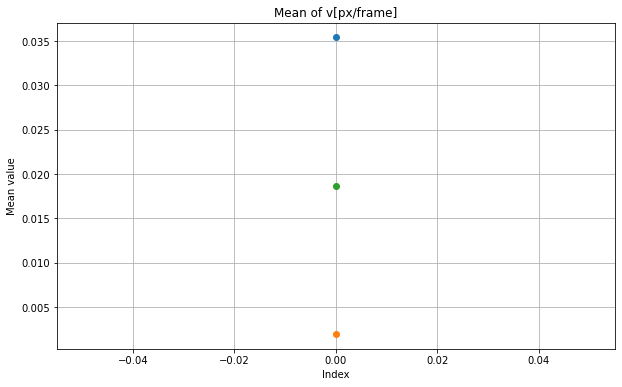

In [25]:

# Filter the DataFrame based on the conditions
filtered_data = laserdata[(laserdata['x [px]'] >= 20) & (laserdata['x [px]'] <= 228) & 
                          (laserdata['y [px]'] >= 20) & (laserdata['y [px]'] <= 580)]
filtered_data2 = laserdata[(laserdata['x [px]'] >= 388) & (laserdata['x [px]'] <= 580) & 
                          (laserdata['y [px]'] >= 20) & (laserdata['y [px]'] <= 580)]
# Calculate the mean of the 'v [px/frame]' column
mean_value = filtered_data['v [px/frame]'].mean()*0.1083095/0.51
mean_value2 = filtered_data2['v [px/frame]'].mean()*0.1083095
# Plot the mean value
plt.figure(figsize=(10, 6))
plt.plot(mean_value, marker='o')
plt.plot(mean_value2, marker='o')
plt.plot(np.mean([mean_value,mean_value2]), marker='o')
plt.title('Mean of v[px/frame]')
plt.xlabel('Index')
plt.ylabel('Mean value')
plt.grid(True)
plt.show()

In [32]:
laserdata.head(50)

,x [px],y [px],u [px/frame],v [px/frame],Vector type [-]
0,20,20,NaN,NaN,2
1,20,36,-1.003974,1.002873,1
2,20,52,-0.978834,0.163970,1
3,20,68,-1.126571,0.048679,1
4,20,84,-0.980890,0.079142,1
5,20,100,-1.190059,0.390640,1
6,20,116,-1.308704,0.477469,1
7,20,132,-1.011660,0.178809,1
8,20,148,-0.265550,0.502089,1
9,20,164,-0.315606,0.658699,1


In [36]:
filtered_data2

,x [px],y [px],u [px/frame],v [px/frame],Vector type [-]
828,388,20,0.255108,0.165112,1
829,388,36,-0.452676,-0.126266,1
830,388,52,-0.672145,-0.472344,1
831,388,68,-0.563190,-0.360200,1
832,388,84,-0.348939,-0.513631,1
...,...,...,...,...,...
1291,580,516,-0.527864,0.053755,1
1292,580,532,-0.938741,-0.139323,1
1293,580,548,-0.982649,0.037221,1
1294,580,564,-0.659622,0.678036,1


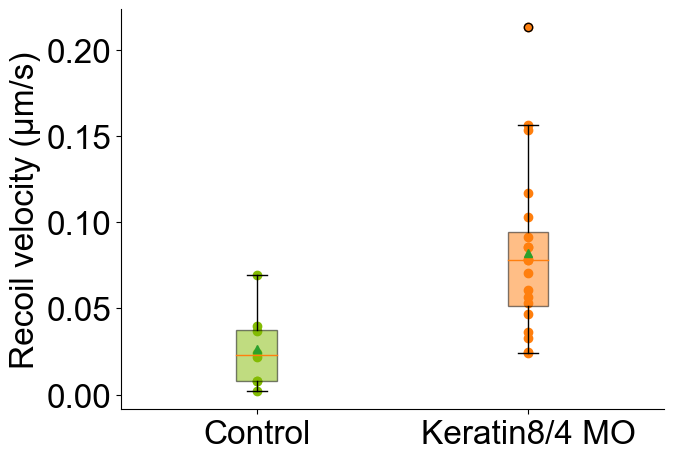

In [49]:
folder="H:\\PHD_data\\Imaging_et_analysis\\SDlaserCuter\\2023\\06_Jun\\30062023_krt18Utr_7hpfcuts\\CutAutoAnalysis\\"
controldata=pd.read_excel(glob(folder+"*control*")[0],header=None)
keratindata=pd.read_excel(glob(folder+"*keratin*")[0],header=None)
#plot the mean of the control and keratin data first row as a box plot and show the values as a scatter on the plot
plt.figure(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

box_plot =plt.boxplot([controldata.iloc[0],keratindata.iloc[0]],showmeans=True,patch_artist=True,labels=['Control','Keratin8/4 MO'])
plt.scatter(np.ones(len(controldata.iloc[0])),controldata.iloc[0],color="#83bb03")
plt.scatter(np.ones(len(keratindata.iloc[0]))*2,keratindata.iloc[0],color="#ff7f0e")
plt.ylabel('Recoil velocity (μm/s)')
plt.xticks([1,2],['Control','Keratin8/4 MO'])
colors=["#83bb03","#ff7f0e"]
for bplo in box_plot:
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.5)

plt.savefig(folder+"control_keratin8_4MO_boxplot.png",dpi=300,bbox_inches='tight')
plt.savefig(folder+"control_keratin8_4MO_boxplot.svg",dpi=300,bbox_inches='tight')
plt.savefig(folder+"control_keratin8_4MO_boxplot.pdf",dpi=300,bbox_inches='tight')
plt.show()

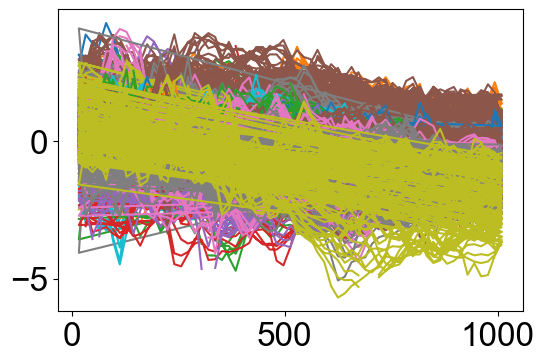

In [53]:
#FLOW PROFILE TEMP
folder="H:\\PHD_data\\Imaging_et_analysis\\NikSD\\2023\\03_Mar\\26032023\\20230326_162415_855\\TimeSrs0000\\Pos0001\\ASCIIFiles\\"
morphantfiles=glob(folder+"*.txt")
for file in morphantfiles:
    data=pd.read_csv(file,skiprows=2)
    plt.plot(data['y [px]'],data['v [px/frame]'])

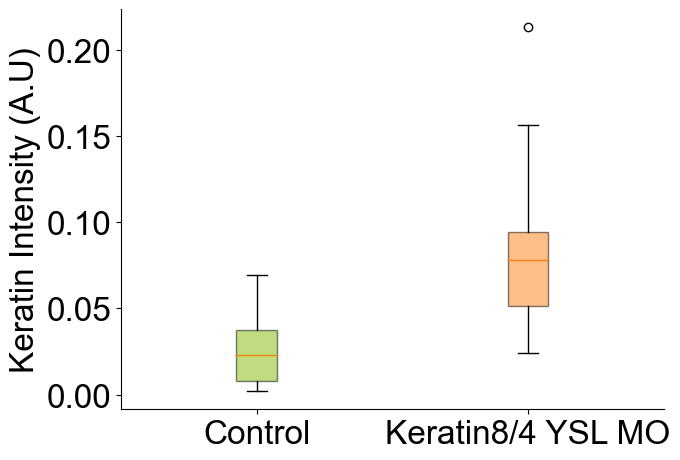

In [61]:
keratinYSL=[39.61,21.252,38.523,66.423,32.563]
controlYSL=[26.408,68.366,60.386,72.050]
plt.figure(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

box_plot =plt.boxplot([controldata.iloc[0],keratindata.iloc[0]],patch_artist=True,labels=['Control','Keratin8/4 MO'])
plt.ylabel('Keratin Intensity (A.U)')
plt.xticks([1,2],['Control','Keratin8/4 MO'])
colors=["#83bb03","#ff7f0e"]
for bplo in box_plot:
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.5)


### Wound healing analysis 
Todo <br>
[ ] Redo Area plot from last time <br>
[ ] delta function <br>

In [3]:
testfiles=glob("H:\\PHD_data\\Imaging_et_analysis\\SDlaserCuter\\2024\\02_Feb\\01022024_TgKrt18UtrWoundhealing\\*\\"+"*.csv")
testpd=pd.read_csv(testfiles[0],header=None)

In [31]:
def create_combined_dataframe(directory,time_interval=20):
    # List to hold dataframes
    df_list = []
    sample=input(f"Is {directory} 'Control' or 'K4K8 MO'?")
    # Iterate over all CSV files in the directory
    for filename in glob(directory+"\\*\\*Wound*.csv"):
        if filename.endswith('.csv'):
            # Create dataframe from CSV file and append it to the list
            df = pd.read_csv(os.path.join(directory, filename))
            
            # Add a column to identify the file
            date=find(r"\d{8}",filename)[0]
            posname=find(r'[Pp]os\d{3}',filename)[0]
            if sample==None:
                sample=input(f"Is {filename} 'Control' or 'K4K8 MO'?")
            
            df["Time"]=df[" "]*time_interval/60 #20 sec time interval for each frame
            df["Samplename"]=[sample]*len(df)
            df['filename'] = f"{date}_{posname}_{sample}"
            df_list.append(df)

    # Concatenate all dataframes in the list
    combined_df = pd.concat(df_list, ignore_index=True)

    return combined_df
def plot_param(parameter,cdf):
    samplelist=cdf['Samplename'].unique()
    plotpd=pd.DataFrame()
    for sample in samplelist:
        filtered_data=cdf[cdf['Samplename']==sample]
        pivotpd=filtered_data.pivot(index='Time',columns='filename',values=parameter)
        mean_area=pivotpd.mean(axis=1)
        std_area=pivotpd.std(axis=1)
        plotpd[sample+"_Mean"]=mean_area
        plotpd[sample+"_Std"]=std_area
    fig, ax = plt.subplots(figsize=(7, 5.3))
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['font.size'] = 24
    plt.rcParams['savefig.dpi'] = 300
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    ax.set_yticks(np.arange(0,9000, 500), minor=True)
    ax.set_xticks(np.arange(plotpd.index[-1], -1, -20), minor=True)
    ax.plot(plotpd.index,plotpd[samplelist[0]+"_Mean"],label="       ",color="#83bb03")
    ax.fill_between(plotpd.index,plotpd[samplelist[0]+"_Mean"]-plotpd[samplelist[0]+"_Std"],plotpd[samplelist[0]+"_Mean"]+plotpd[samplelist[0]+"_Std"],alpha=0.3,color="#83bb03")
    ax.plot(plotpd.index,plotpd[samplelist[1]+"_Mean"],label="          ",color="#ff7f0e")
    ax.fill_between(plotpd.index,plotpd[samplelist[1]+"_Mean"]-plotpd[samplelist[1]+"_Std"],plotpd[samplelist[1]+"_Mean"]+plotpd[samplelist[1]+"_Std"],alpha=0.3,color="#ff7f0e")
    ax.set_ylabel(parameter)
    #ax.set_xlabel('Time (min)')
    ax.legend(frameon=False,fontsize=18)


def delta(timelist,ylist):
    return (ylist[-1]-ylist[0])/(timelist[-1]-timelist[0])


In [16]:
folder1="H:\\PHD_data\\Imaging_et_analysis\\SDlaserCuter\\2024\\02_Feb\\01022024_TgKrt18UtrWoundhealing\\"
folder2="H:\\PHD_data\\Imaging_et_analysis\\SDlaserCuter\\2024\\02_Feb\\15022024_TgKrt18UtrWoundhealing\\"
folder3="H:\\PHD_data\\Imaging_et_analysis\\SDlaserCuter\\2024\\02_Feb\\27022023_TgLifeactGFPWoundhealing\\"
folder4="H:\\PHD_data\\Imaging_et_analysis\\SDlaserCuter\\2024\\03_Mar\\07032023_TgK18GUtrmK4K8MOWoundhealing\\"

In [21]:
compd_test1=create_combined_dataframe(folder1)
compd_test2=create_combined_dataframe(folder2)
compd_test3=create_combined_dataframe(folder3)
compd_test4=create_combined_dataframe(folder4)

<Axes: xlabel='Time'>

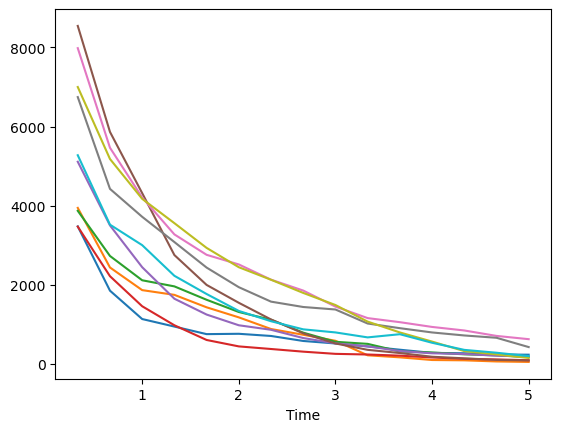

In [22]:

compd_test3.pivot(index="Time",columns='filename',values='Area').plot(legend=False)

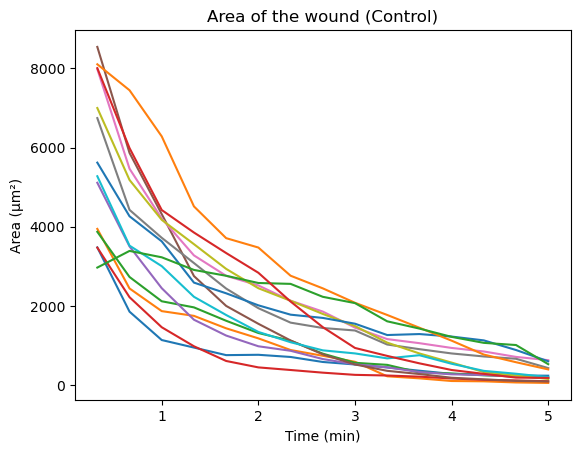

In [23]:
#plot area for control embryos combined

controlpd=pd.concat([compd_test3.pivot(index='Time',columns='filename',values='Area'),compd_test1.pivot(index="Time",columns='filename',values='Area')])
controlpd.plot(legend=False)
plt.title("Area of the wound (Control)")
plt.xlabel("Time (min)")
plt.ylabel("Area (μm²)")
plt.savefig(folder3+"Wound_area_Control.png",dpi=300,bbox_inches='tight')
plt.savefig(folder3+"Wound_area_Control.svg",dpi=300,bbox_inches='tight')
plt.savefig(folder3+"Wound_area_Control.pdf",dpi=300,bbox_inches='tight')
plt.show()

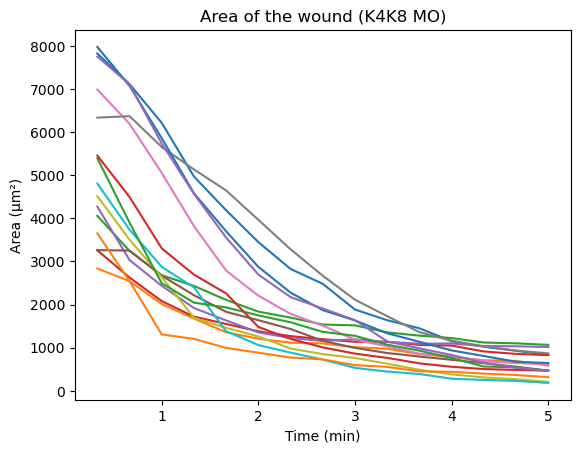

In [25]:
#plot a histogram of the occurance of the filenames in compd_test2

KeratinMOpd=pd.concat([compd_test4.pivot(index='Time',columns='filename',values='Area'),compd_test2.pivot(index="Time",columns='filename',values='Area')])
KeratinMOpd.plot(legend=False)
plt.title("Area of the wound (K4K8 MO)")
plt.xlabel("Time (min)")
plt.ylabel("Area (μm²)")
plt.savefig(folder4+"Wound_area_K4K8MO.png",dpi=300,bbox_inches='tight')
plt.savefig(folder4+"Wound_area_K4K8MO.svg",dpi=300,bbox_inches='tight')
plt.savefig(folder4+"Wound_area_K4K8MO.pdf",dpi=300,bbox_inches='tight')
plt.show()



In [36]:
compd_test1.columns

Index([' ', 'Area', 'Mean', 'X', 'Y', 'Perim.', 'Major', 'Minor', 'Angle',
       'Circ.', '%Area', 'AR', 'Round', 'Solidity', 'Time', 'Samplename',
       'filename', 'Skew', 'Min', 'Max'],
      dtype='object')

In [5]:
pdcom=pd.read_csv("H:\\PHD_data\\Imaging_et_analysis\\SDlaserCuter\\2024\\02_Feb\\combined.csv")
plot_param("Area",pdcom)

FileNotFoundError: [Errno 2] No such file or directory: 'H:\\PHD_data\\Imaging_et_analysis\\SDlaserCuter\\2024\\02_Feb\\combined.csv'

In [35]:
savefolder="H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure4/WoundArea/"

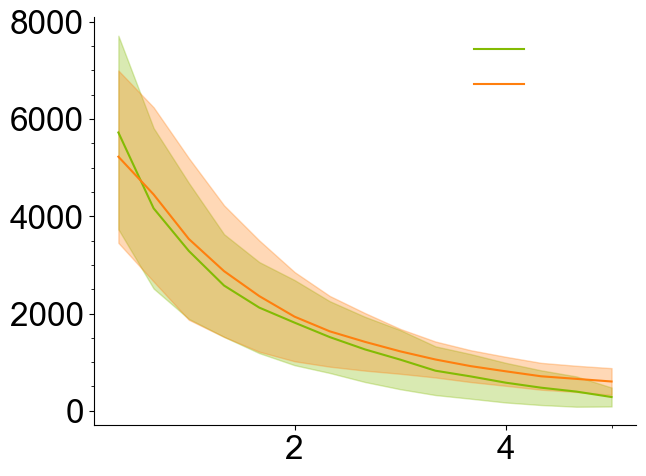

In [37]:
compCombined=pd.concat([compd_test1,compd_test2,compd_test3,compd_test4],ignore_index=True)  
savefolder="H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure4/WoundArea/"

compCombined.to_csv(savefolder+"Woundarea.csv")
plot_param('Area',compCombined)
plt.ylabel('')
plt.savefig(savefolder+"Area_sem.png",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(savefolder+"Area_sem.svg",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(savefolder+"Area_sem.pdf",dpi=300,bbox_inches='tight',transparent=True)
plt.show()


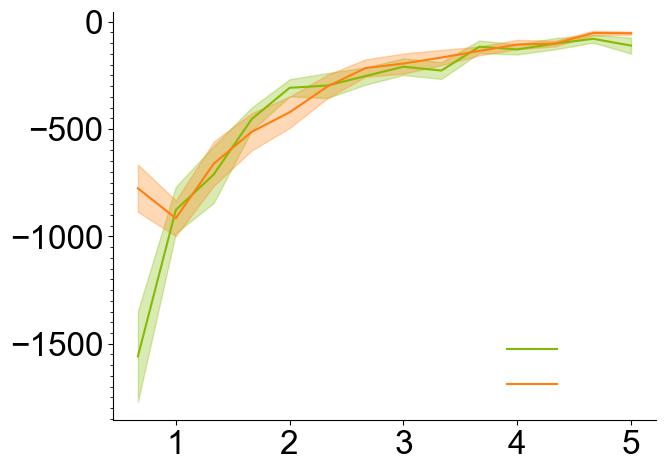

In [41]:
samplelist=compCombined['Samplename'].unique()
plotpd=pd.DataFrame()
for sample in samplelist:
    filtered_data=compCombined[compCombined['Samplename']==sample]
    pivotpd=filtered_data.pivot(index='Time',columns='filename',values='Area').diff()
    mean_area=pivotpd.mean(axis=1)
    std_area=pivotpd.sem(axis=1)
    plotpd[sample+"_Mean"]=mean_area
    plotpd[sample+"_Std"]=std_area
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
ax.set_yticks(np.arange(-2300,0, 50), minor=True)
ax.set_xticks(np.arange(plotpd.index[-1], -1, -20), minor=True)
ax.plot(plotpd.index,plotpd[samplelist[0]+"_Mean"],label="    ",color="#83bb03")
ax.fill_between(plotpd.index,plotpd[samplelist[0]+"_Mean"]-plotpd[samplelist[0]+"_Std"],plotpd[samplelist[0]+"_Mean"]+plotpd[samplelist[0]+"_Std"],alpha=0.3,color="#83bb03")
ax.plot(plotpd.index,plotpd[samplelist[1]+"_Mean"],label="        ",color="#ff7f0e")
ax.fill_between(plotpd.index,plotpd[samplelist[1]+"_Mean"]-plotpd[samplelist[1]+"_Std"],plotpd[samplelist[1]+"_Mean"]+plotpd[samplelist[1]+"_Std"],alpha=0.3,color="#ff7f0e")
#ax.set_ylabel('del Area')
#ax.set_xlabel('Time (min)')
ax.legend(frameon=False,fontsize=18)
plt.savefig(savefolder+"delArea_sem.png",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(savefolder+"delArea_sem.svg",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(savefolder+"delArea_sem.pdf",dpi=300,bbox_inches='tight',transparent=True)

In [50]:
testdir="H:\\PHD_data\\Imaging_et_analysis\\SDlaserCuter\\2024\\02_Feb\\01022024_TgKrt18UtrWoundhealing"
tcombpd=create_combined_dataframe(testdir)
tcombpd

,,Area,Mean,X,Y,Perim.,Major,Minor,Angle,Circ.,%Area,AR,Round,Solidity,Time,Samplename,filename,Skew,Min,Max
0,1,5619.210,117.354,113.706,103.865,398.599,149.381,47.895,31.249,0.444,100,3.119,0.321,0.770,0.333333,Control,01022024_Pos014_Control,NaN,NaN,NaN
1,2,4263.792,116.919,121.067,102.461,332.513,126.806,42.812,29.440,0.485,100,2.962,0.338,0.821,0.666667,Control,01022024_Pos014_Control,NaN,NaN,NaN
2,3,3630.391,116.916,123.616,105.656,279.601,118.962,38.856,31.241,0.584,100,3.062,0.327,0.936,1.000000,Control,01022024_Pos014_Control,NaN,NaN,NaN
3,4,2588.084,116.789,122.323,107.915,260.784,104.190,31.627,30.495,0.478,100,3.294,0.304,0.859,1.333333,Control,01022024_Pos014_Control,NaN,NaN,NaN
4,5,2318.014,116.767,122.639,106.414,250.934,100.755,29.293,31.754,0.463,100,3.440,0.291,0.870,1.666667,Control,01022024_Pos014_Control,NaN,NaN,NaN
5,6,2014.264,116.800,119.516,107.350,225.891,93.383,27.464,32.804,0.496,100,3.400,0.294,0.874,2.000000,Control,01022024_Pos014_Control,NaN,NaN,NaN
6,7,1778.296,116.766,119.041,106.617,213.744,89.045,25.427,31.402,0.489,100,3.502,0.286,0.885,2.333333,Control,01022024_Pos014_Control,NaN,NaN,NaN
7,8,1696.332,116.736,118.588,106.583,207.035,86.450,24.984,30.983,0.497,100,3.460,0.289,0.891,2.666667,Control,01022024_Pos014_Control,NaN,NaN,NaN
8,9,1550.176,116.522,119.470,105.131,201.726,84.394,23.387,29.695,0.479,100,3.609,0.277,0.881,3.000000,Control,01022024_Pos014_Control,NaN,NaN,NaN
9,10,1263.987,116.120,121.713,102.244,171.674,73.299,21.956,25.080,0.539,100,3.338,0.300,0.951,3.333333,Control,01022024_Pos014_Control,NaN,NaN,NaN


In [53]:
filtered_data = tcombpd[tcombpd['Samplename'] == 'Control']
grouping = filtered_data.pivot(index='Time', columns='filename', values='Area')
mean_area= grouping.mean(axis=1)
filtered_data.pivot(index='Time', columns='filename', values='Area')

filename,01022024_Pos014,01022024_Pos018,01022024_Pos020,01022024_Pos023
Time,,,,
0.333333,5619.210,8103.651,2967.991,12433.887
0.666667,4263.792,7447.480,3388.862,12433.887
1.000000,3630.391,6282.174,3227.573,9829.967
1.333333,2588.084,4513.415,2908.409,7255.256
1.666667,2318.014,3711.264,2760.986,5956.921
2.000000,2014.264,3474.029,2578.406,5047.784
2.333333,1778.296,2762.535,2556.164,4368.737
2.666667,1696.332,2443.265,2229.609,3369.084
3.000000,1550.176,2078.596,2070.291,2377.665


<Axes: xlabel='Time'>

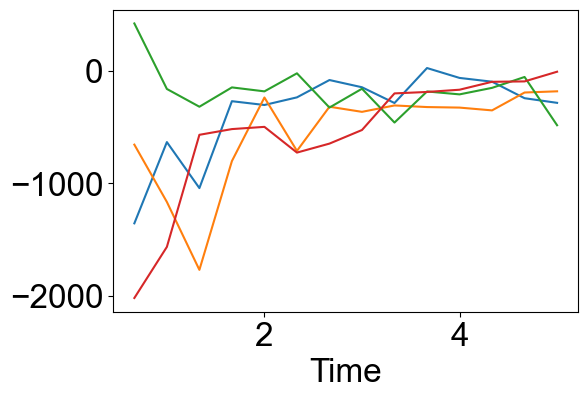

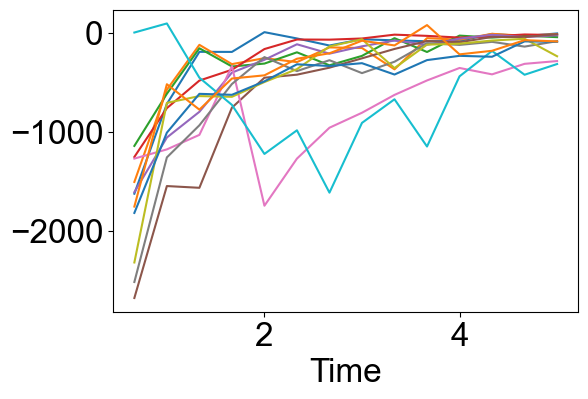

In [100]:
#take the gradient of area over time in control pd and keratin pd and plot 
#the mean of the gradient over time
compd_test1.pivot(index="Time",columns='filename',values='Area').diff().plot(legend=False)
compd_test3.pivot(index="Time",columns='filename',values='Area').diff().plot(legend=False)

<Axes: xlabel='Time'>

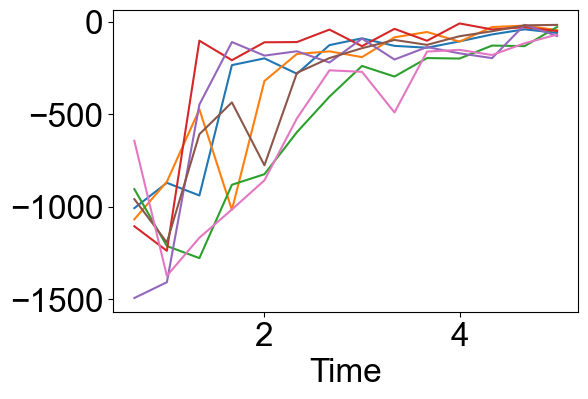

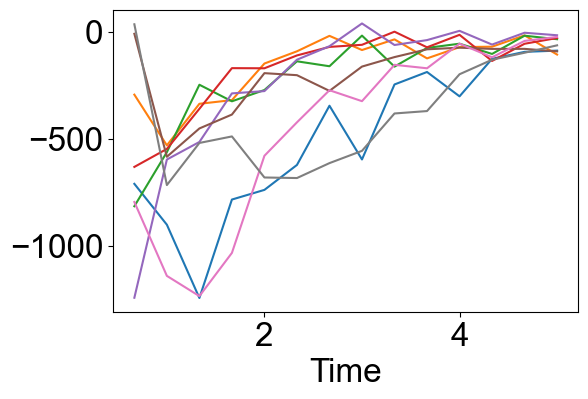

In [101]:
compd_test2.pivot(index="Time",columns='filename',values='Area').diff().plot(legend=False)
compd_test4.pivot(index="Time",columns='filename',values='Area').diff().plot(legend=False)